**Black Friday sales prediction analysis**

Different regression techniques have been implemented in this exercise to compare their accuracy in predicting the Black Friday sales

In [1]:
# import the dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os

#### Load the data

In [122]:
data = pd.read_csv("BlackFridaySales.csv")

In [43]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


#### Data Cleaning

In [44]:
data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


- As from the above we can observe that there are null values in the 'Product_category_2' and 'Product_category_3'

In [46]:
# Fill the null values with the mean of that particular column
data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mean())
data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mean())

In [47]:
# Now again Check for the null values
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


- After Filling all the null values with their respective mean there are no null values in our dataset

In [49]:
# Check the basic stats
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.207852,2.271830,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


#### Outlier Detection

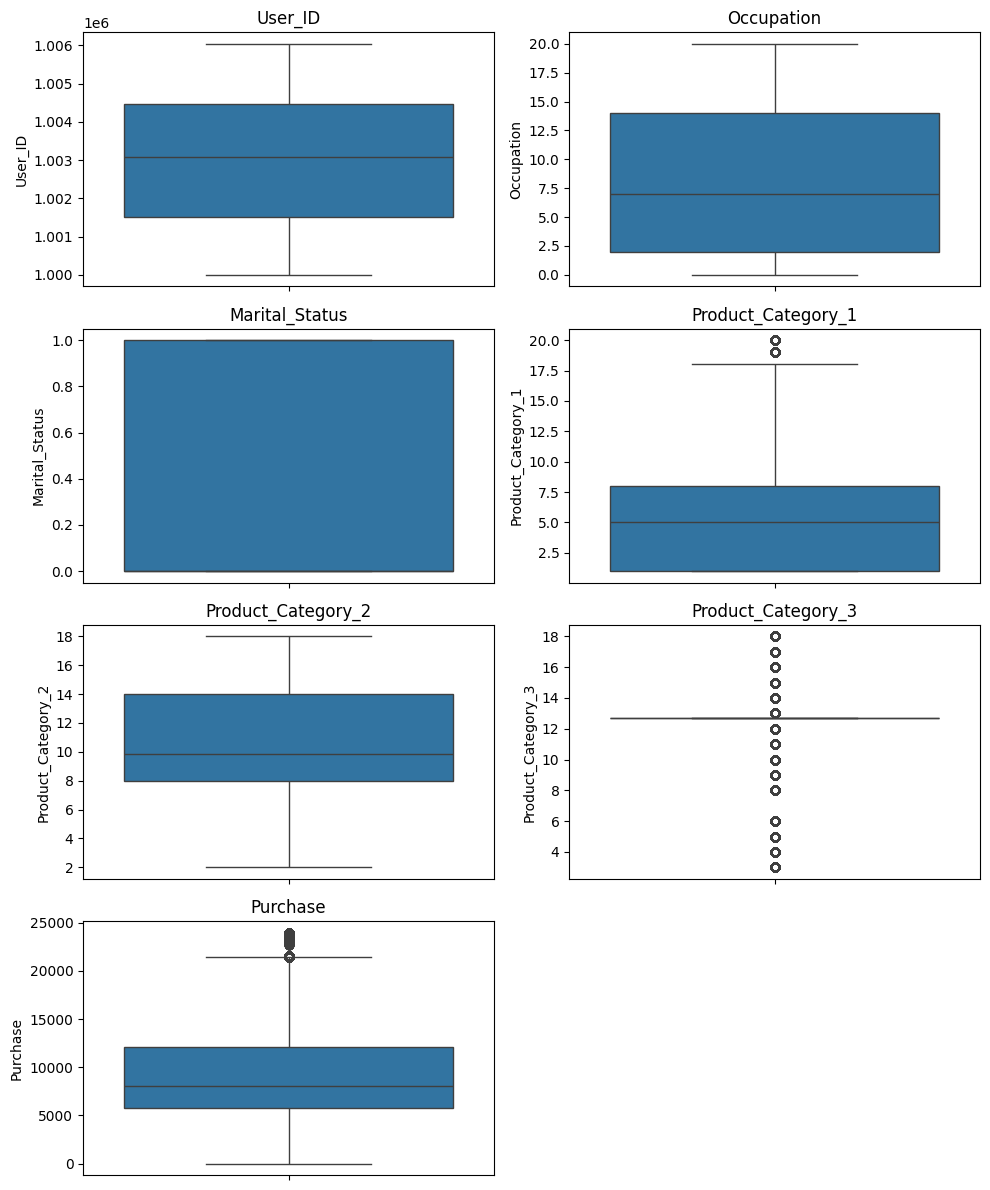

In [50]:
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10, 12))

# Subplot 1
plt.subplot(4, 2, 1)
sns.boxplot(data['User_ID'])
plt.title("User_ID")

# Subplot 2
plt.subplot(4, 2, 2)
sns.boxplot(data['Occupation'])
plt.title("Occupation")

# Subplot 3
plt.subplot(4, 2, 3)
sns.boxplot(data['Marital_Status'])
plt.title("Marital_Status")

# Subplot 4
plt.subplot(4, 2, 4)
sns.boxplot(data['Product_Category_1'])
plt.title("Product_Category_1")

# Subplot 5
plt.subplot(4, 2, 5)
sns.boxplot(data['Product_Category_2'])
plt.title("Product_Category_2")

# Subplot 6
plt.subplot(4, 2, 6)
sns.boxplot(data['Product_Category_3'])
plt.title("Product_Category_3")

# Subplot 7
plt.subplot(4, 2, 7)
sns.boxplot(data['Purchase'])
plt.title("Purchase")

plt.tight_layout()
plt.show()

- We are having outliers in the columns 'Product_Category_1','Product_Category_3','Purchase'. These can be handled by the Cliping method

In [51]:
# Clipping method
data['Product_Category_1'] = data['Product_Category_1'].clip(lower=data['Product_Category_1'].quantile(0.05),upper=data['Product_Category_1'].quantile(0.95))
data['Product_Category_3'] = data['Product_Category_3'].clip(lower=data['Product_Category_3'].quantile(0.05),upper=data['Product_Category_3'].quantile(0.95))
data['Purchase'] = data['Purchase'].clip(lower=data['Purchase'].quantile(0.05),upper=data['Purchase'].quantile(0.95))

#### Exploratory Analysis

<Figure size 800x600 with 0 Axes>

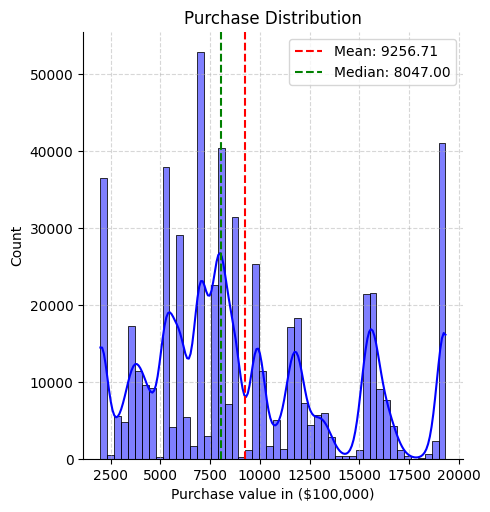

Mean of the Purchase is 9256.71048852142
Median of the Purchase is 8047.0


In [52]:
# Plot a histogram to see the distribution of median_house_value
plt.figure(figsize=(8, 6))
sns.displot(data['Purchase'],bins=50,kde=True,color='blue', edgecolor='black', alpha=0.5)
plt.title("Purchase Distribution")
plt.xlabel("Purchase value in ($100,000)")

plt.grid(True, linestyle='--', alpha=0.5)
mean_purchase = data['Purchase'].mean()
median_purchase = data['Purchase'].median()
plt.axvline(mean_purchase, color='red', linestyle='--', label=f'Mean: {mean_purchase:.2f}')
plt.axvline(median_purchase, color='green', linestyle='--', label=f'Median: {median_purchase:.2f}')

plt.legend()
plt.show()

print('Mean of the Purchase is',mean_purchase)
print('Median of the Purchase is',median_purchase)
plt.show()

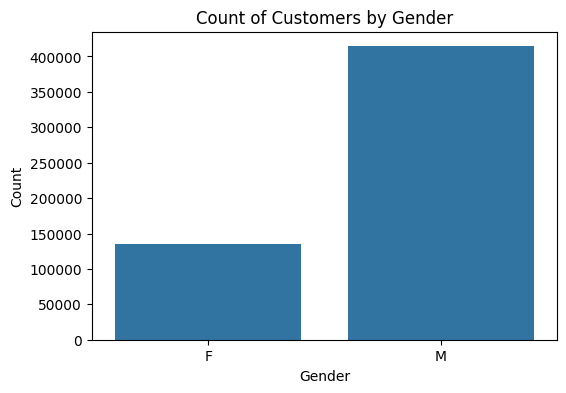

In [53]:
# Bar plot of count of customer by different gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data)
plt.title('Count of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

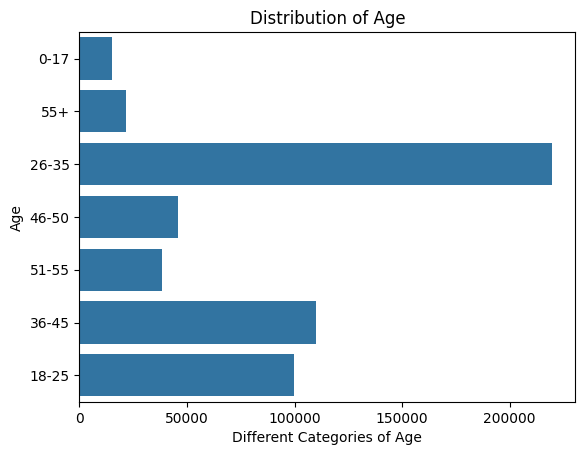

In [54]:
# Distribution of age
sns.countplot(data['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()

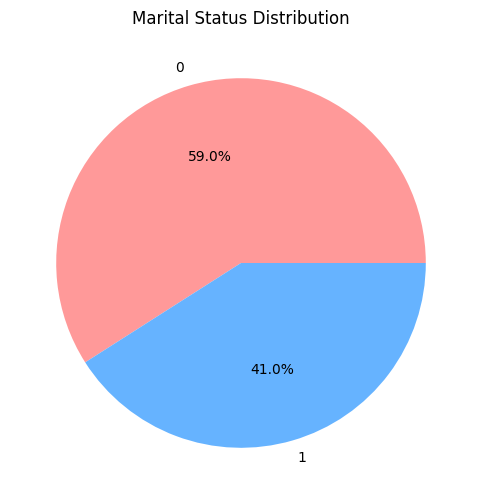

In [55]:
# Pie chart of marital_status
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(8, 6))
data['Marital_Status'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colors)
plt.title('Marital Status Distribution')
plt.ylabel('')
plt.show()

In [56]:
# # the distribution of individuals across different occupations.
# plt.figure(figsize=(18,5))
# sns.countplot(data['Occupation'])
# plt.show()

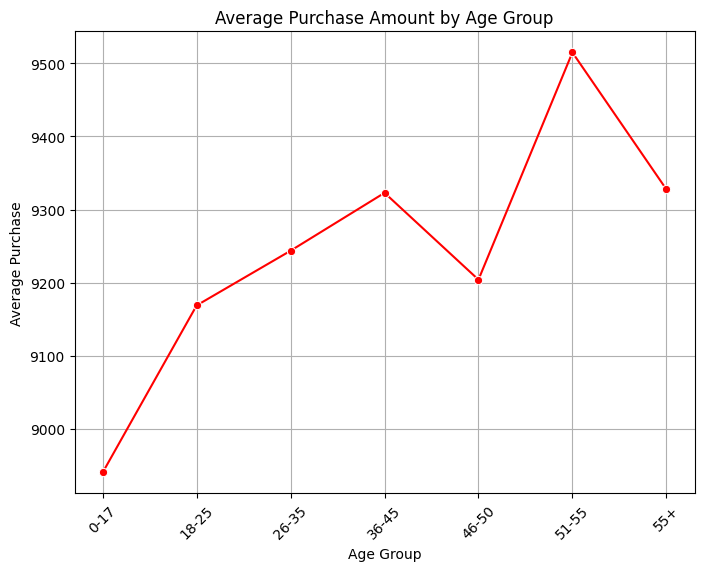

In [57]:
# the average purchase amount by age group
age_purchase_avg = data.groupby('Age')['Purchase'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.lineplot(x='Age', y='Purchase', data=age_purchase_avg, marker='o', color='r')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [58]:
# drop the 'Product_ID' column as it has no role in analysis
data = data.drop(data[['Product_ID']], axis=1)

In [65]:
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,F,0-17,10,A,2,0,3,9.842329,12.668243,8370
1,1000001,F,0-17,10,A,2,0,1,6.000000,14.000000,15200
2,1000001,F,0-17,10,A,2,0,12,9.842329,12.668243,1984
3,1000001,F,0-17,10,A,2,0,12,14.000000,12.668243,1984
4,1000002,M,55+,16,C,4+,0,8,9.842329,12.668243,7969


In [66]:
# drop user id, gender, age, city category, 'Stay_In_Current_City_Years' as well
data1 = data.drop(data[['User_ID', 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']], axis=1)
data1.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,9.842329,12.668243,8370
1,10,0,1,6.000000,14.000000,15200
2,10,0,12,9.842329,12.668243,1984
3,10,0,12,14.000000,12.668243,1984
4,16,0,8,9.842329,12.668243,7969


In [67]:
# correlation
correlation = data1.corr()
correlation.style.background_gradient()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.024280,-0.010175,-0.000317,0.008357,0.021220
Marital_Status,0.024280,1.000000,0.020340,0.012507,0.008498,-0.000522
Product_Category_1,-0.010175,0.020340,1.000000,0.413485,0.061002,-0.382302
Product_Category_2,-0.000317,0.012507,0.413485,1.000000,0.291044,-0.186338
Product_Category_3,0.008357,0.008498,0.061002,0.291044,1.000000,0.011812
Purchase,0.021220,-0.000522,-0.382302,-0.186338,0.011812,1.000000


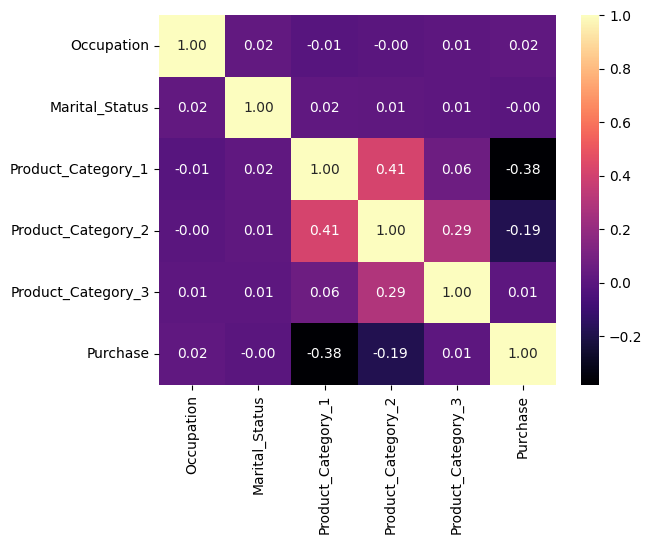

In [69]:
# Heatmap of correlation
sns.heatmap(data = correlation,annot=True,fmt='.2f',cmap='magma')
plt.show()

**Interpretations of above correlation matrix**

- 'Product_Category_1' is positively correlated with the 'Product_category_2'



- 'Product_Category_2' is positively correlated with the 'Product_category_3'

#### Categorical Encoding

- We perform Categorical encoding to convert the categorical values into numerical values by creating the dummy values

In [70]:
encoded_data = pd.get_dummies(data[['Gender','City_Category']])
encoded_data

,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,True,False,True,False,False
1,True,False,True,False,False
2,True,False,True,False,False
3,True,False,True,False,False
4,False,True,False,False,True
...,...,...,...,...,...
550063,False,True,False,True,False
550064,True,False,False,False,True
550065,True,False,False,True,False
550066,True,False,False,False,True


In [71]:
# Now combine this encoded data into original data frame
data = pd.concat([data,encoded_data],axis=1)
data.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,1000001,F,0-17,10,A,2,0,3,9.842329,12.668243,8370,True,False,True,False,False
1,1000001,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,True,False,True,False,False
2,1000001,F,0-17,10,A,2,0,12,9.842329,12.668243,1984,True,False,True,False,False
3,1000001,F,0-17,10,A,2,0,12,14.000000,12.668243,1984,True,False,True,False,False
4,1000002,M,55+,16,C,4+,0,8,9.842329,12.668243,7969,False,True,False,False,True


In [76]:
data2 = data.drop(data[['User_ID', 'Age', 'Gender', 'City_Category', 'Stay_In_Current_City_Years']],axis=1)

In [77]:
data2.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,10,0,3,9.842329,12.668243,8370,True,False,True,False,False
1,10,0,1,6.000000,14.000000,15200,True,False,True,False,False
2,10,0,12,9.842329,12.668243,1984,True,False,True,False,False
3,10,0,12,14.000000,12.668243,1984,True,False,True,False,False
4,16,0,8,9.842329,12.668243,7969,False,True,False,False,True


In [78]:
# Once again check the correlation of new dummy variables
correlation2 = data2.corr()
correlation2.style.background_gradient()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
Occupation,1.000000,0.024280,-0.010175,-0.000317,0.008357,0.021220,-0.117291,0.117291,-0.023070,-0.011673,0.034529
Marital_Status,0.024280,1.000000,0.020340,0.012507,0.008498,-0.000522,0.011603,-0.011603,-0.033088,-0.001863,0.033661
Product_Category_1,-0.010175,0.020340,1.000000,0.413485,0.061002,-0.382302,0.053707,-0.053707,0.020278,-0.003329,-0.015863
Product_Category_2,-0.000317,0.012507,0.413485,1.000000,0.291044,-0.186338,0.015300,-0.015300,0.009638,-0.002249,-0.006829
Product_Category_3,0.008357,0.008498,0.061002,0.291044,1.000000,0.011812,-0.018328,0.018328,-0.000345,0.000174,0.000145
Purchase,0.021220,-0.000522,-0.382302,-0.186338,0.011812,1.000000,-0.061334,0.061334,-0.043875,-0.019858,0.063172
Gender_F,-0.117291,0.011603,0.053707,0.015300,-0.018328,-0.061334,1.000000,-1.000000,-0.007299,0.006155,0.000426
Gender_M,0.117291,-0.011603,-0.053707,-0.015300,0.018328,0.061334,-1.000000,1.000000,0.007299,-0.006155,-0.000426
City_Category_A,-0.023070,-0.033088,0.020278,0.009638,-0.000345,-0.043875,-0.007299,0.007299,1.000000,-0.515898,-0.407268
City_Category_B,-0.011673,-0.001863,-0.003329,-0.002249,0.000174,-0.019858,0.006155,-0.006155,-0.515898,1.000000,-0.572277


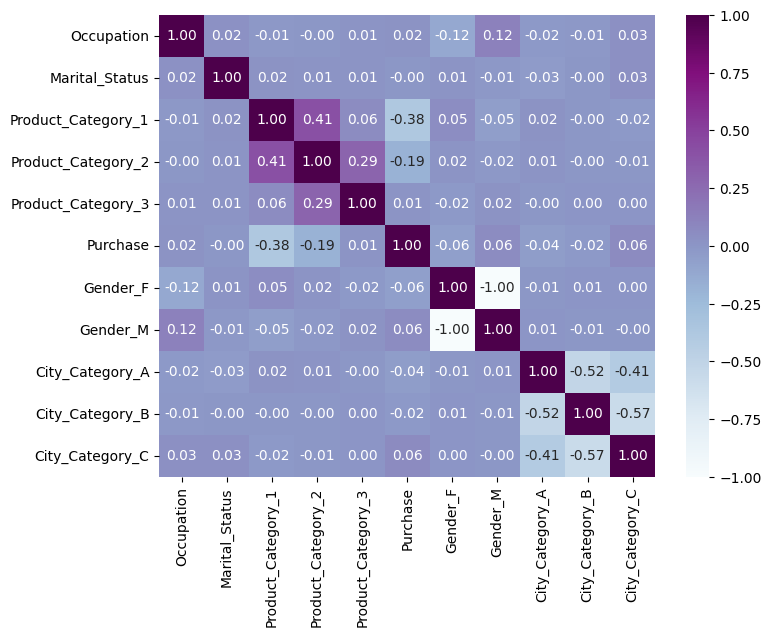

In [79]:
# Heatmap of correlation
plt.figure(figsize=(8, 6))
sns.heatmap(data = correlation2,annot=True,fmt='.2f',cmap='BuPu')
plt.show()

In [81]:
# Remove the unwanted columns which are not more priority to the model building
columns_to_drop = ['User_ID']
data = data.drop(columns_to_drop, axis=1)

In [82]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
0,F,0-17,10,A,2,0,3,9.842329,12.668243,8370,True,False,True,False,False
1,F,0-17,10,A,2,0,1,6.000000,14.000000,15200,True,False,True,False,False
2,F,0-17,10,A,2,0,12,9.842329,12.668243,1984,True,False,True,False,False
3,F,0-17,10,A,2,0,12,14.000000,12.668243,1984,True,False,True,False,False
4,M,55+,16,C,4+,0,8,9.842329,12.668243,7969,False,True,False,False,True


In [83]:
# Extract the last value of each age range
data['Age_Value'] = data['Age'].str.split('-').str[-1].str.replace('+', '').astype(int)
print(data.head())

  Gender   Age  Occupation City_Category Stay_In_Current_City_Years  \
0      F  0-17          10             A                          2   
1      F  0-17          10             A                          2   
2      F  0-17          10             A                          2   
3      F  0-17          10             A                          2   
4      M   55+          16             C                         4+   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3            9.842329           12.668243   
1               0                   1            6.000000           14.000000   
2               0                  12            9.842329           12.668243   
3               0                  12           14.000000           12.668243   
4               0                   8            9.842329           12.668243   

   Purchase  Gender_F  Gender_M  City_Category_A  City_Category_B  \
0      8370      

In [84]:
data = data.drop('Age',axis=1)

In [85]:
data['Stay_In_Current_City_Years']

0          2
1          2
2          2
3          2
4         4+
          ..
550063     1
550064     3
550065    4+
550066     2
550067    4+
Name: Stay_In_Current_City_Years, Length: 550068, dtype: object

In [86]:
# Convert '4+' to a representative value (5 in this case)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', 5).astype(int)
print(data.head())

  Gender  Occupation City_Category  Stay_In_Current_City_Years  \
0      F          10             A                           2   
1      F          10             A                           2   
2      F          10             A                           2   
3      F          10             A                           2   
4      M          16             C                           5   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3            9.842329           12.668243   
1               0                   1            6.000000           14.000000   
2               0                  12            9.842329           12.668243   
3               0                  12           14.000000           12.668243   
4               0                   8            9.842329           12.668243   

   Purchase  Gender_F  Gender_M  City_Category_A  City_Category_B  \
0      8370      True     False             Tru

#### Model Building

In [100]:
# Lets Define the predictors and the target Variable
x = data.drop(data[['Purchase', 'Gender', 'City_Category']], axis=1)
x.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Age_Value
0,10,2,0,3,9.842329,12.668243,True,False,True,False,False,17
1,10,2,0,1,6.000000,14.000000,True,False,True,False,False,17
2,10,2,0,12,9.842329,12.668243,True,False,True,False,False,17
3,10,2,0,12,14.000000,12.668243,True,False,True,False,False,17
4,16,5,0,8,9.842329,12.668243,False,True,False,False,True,55


In [101]:
y = data['Purchase']
y

0          8370
1         15200
2          1984
3          1984
4          7969
          ...  
550063     1984
550064     1984
550065     1984
550066     1984
550067     1984
Name: Purchase, Length: 550068, dtype: int64

In [102]:
# Split the data into training and testing parts
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.2,random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(440054, 12)
(110014, 12)
(440054,)
(110014,)


In [103]:
x_train

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C,Age_Value
401980,7,5,1,8,9.842329,12.668243,False,True,False,False,True,35
368189,14,2,0,8,17.000000,12.668243,False,True,False,True,False,35
181444,7,5,0,8,9.842329,12.668243,False,True,False,False,True,25
238822,20,5,1,5,8.000000,12.668243,False,True,True,False,False,25
127422,0,5,0,5,9.842329,12.668243,True,False,False,False,True,55
...,...,...,...,...,...,...,...,...,...,...,...,...
359783,7,5,0,6,10.000000,13.000000,False,True,False,True,False,35
152315,7,1,1,8,9.842329,12.668243,False,True,False,False,True,50
117952,15,1,1,5,9.842329,12.668243,True,False,False,False,True,50
435829,4,0,1,2,4.000000,12.668243,False,True,True,False,False,25


In [104]:
# Here we perform the scaling of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#### Multiple Linear Regression

In [105]:
# Build an multipple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Train the model
model.fit(x_train,y_train)

LinearRegression()

In [106]:
y_pred_lin = model.predict(x_test)

In [107]:
# Get the coefficients and the interepts
# Print the coefficients and intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [ 3.50452125e+01  1.37514948e+01 -3.15376389e+01 -1.76579754e+03
 -2.47873337e+02  2.31881625e+02 -3.16434871e+14 -3.16434871e+14
  1.76806179e+16  1.96918103e+16  1.84809795e+16  1.66873946e+02]
Intercept: 9254.53249811819


In [108]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate MSE for Multiple Linear Regression
mse = mean_squared_error(y_test, y_pred_lin)
# Calculate R2 for Multiple Linear Regression
r2 = r2_score(y_test, y_pred_lin)*100
print("MSE for Multiple Linear Regression:", mse)
print("R2 for Multiple Linear Regression:", r2)

MSE for Multiple Linear Regression: 19932646.970691428
R2 for Multiple Linear Regression: 15.537044679054791


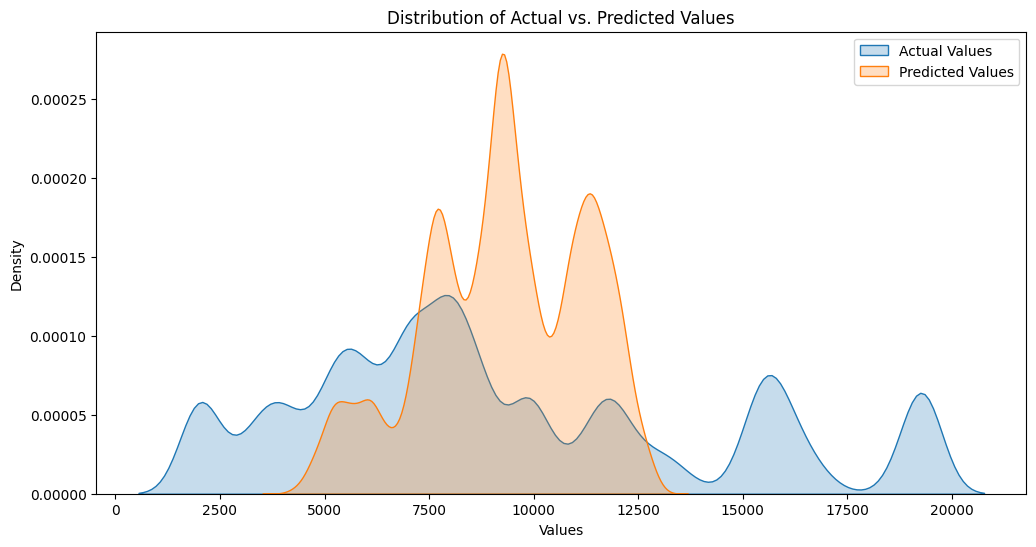

In [109]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label='Actual Values', shade=True, palette='viridis')
sns.kdeplot(y_pred_lin, label='Predicted Values', shade=True, palette='viridis')
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

- We can observe that there is lot of variation between the actual and predicted values so we can conclude that the model is not fitting well.

#### Random Forerst Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
# Create the regressor object
rf = RandomForestRegressor()
# Perform cross-validation with Random Forest Regressor model
rf_scores = cross_val_score(rf, x_train, y_train, cv=5, scoring='r2')
# Fit the model to the training data
rf.fit(x_train, y_train)
# Make predictions on the test data
rf_predictions = rf.predict(x_test)

In [111]:
# Calculate MSE for Random Forest Regressor
mse_rf = mean_squared_error(y_test, rf_predictions)

# Calculate R2 for Random forest regressor
r2_rf = r2_score(y_test, rf_predictions)*100

print("MSE for Random forest regressor:", mse_rf)
print("R2 for Random forest regressor:", r2_rf)

MSE for Random forest regressor: 10717598.199311774
R2 for Random forest regressor: 54.585057409216134


- We can Observe that random forest regressor is performing somewhat better than the multiple linear regression model

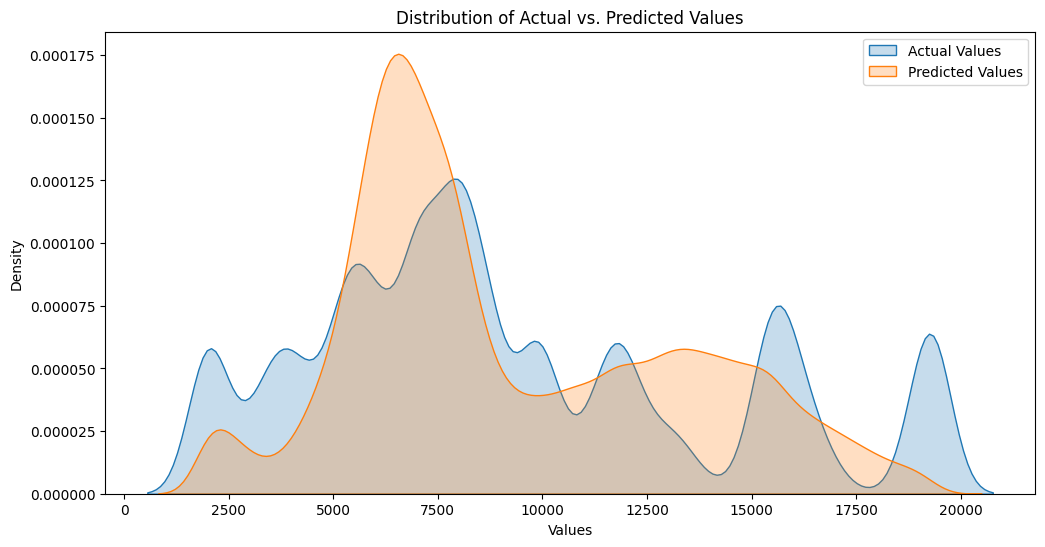

In [112]:
plt.figure(figsize=(12, 6))
sns.kdeplot(y_test, label='Actual Values', shade=True, palette='viridis')
sns.kdeplot(rf_predictions, label='Predicted Values', shade=True, palette='viridis')
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

#### Decision Tree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
# Decision tree regressor
dtree = DecisionTreeRegressor()
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [114]:
dtree.score(x_test,y_test)

0.48204726823947197

In [116]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE (Root Mean Squared Error)
dtree_pred = dtree.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, dtree_pred))
print('RMSE:', rmse)

# Calculate R2 Score
r2 = r2_score(y_test, dtree_pred)
print('R2 Score:', r2)

RMSE: 3496.1850782534525
R2 Score: 0.48204726823947197


- We got very less score for Decision Tree Regressor compared to random forest regressor

#### XGBoost Regressor

In [117]:
!pip install xgboost
from xgboost.sklearn import XGBRegressor

In [118]:
# Create and fit the XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [119]:
# Make predictions
xgb_pred = xgb.predict(x_test)

In [120]:
# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print('RMSE:', rmse)
r2 = r2_score(y_test, xgb_pred)
print('R2 Score:', r2)

RMSE: 3100.418265749337
R2 Score: 0.5926742444369661


- We got some better scores for XGBoost Regressor compared to all other models.